<a href="https://colab.research.google.com/github/ialara/or-student/blob/main/lectures/Population_Sim_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Sim #4 Yearly population model with individuals, births, deaths, sim initiation and sim run
import numpy as np
import matplotlib.pyplot as plt
import random #Added

In [5]:
#Constants Added
init_start_age = 18
init_end_age = 50

fertility_start = 18
fertility_end = 40
baby_odds = 0.25
infant_mortality_reduction = 0.985

old_person = 60
old_death_odds = 0.1

max_population = 100000
end_year = 10000

Population exceeded", max_population, "in year 304


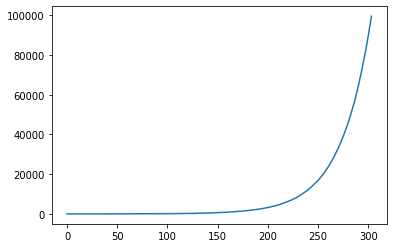

In [6]:
#Initialization variables
year = 0
infant_mortality = 0.5

population = np.zeros(10000)
population[0] = 50 #Added
peopleDictionary = [] #Added

class person: #Added
    def __init__(self, age):
        self.gender = random.randint(0,1)
        self.age = age

def initialize(): #Added
    for individual in range(int(population[0])):
        peopleDictionary.append(person(random.randint(init_start_age, init_end_age)))

def birth(): #Added
    births = 0
    for individual in peopleDictionary:
        if individual.gender == 1 and \
           individual.age > fertility_start and \
           individual.age < fertility_end and \
           random.uniform(0,1) <= baby_odds * (1 - infant_mortality): #Added
              peopleDictionary.append(person(0))
              births += 1
    return births

def death(individual):
    died = False
    if individual.age > old_person \
        and random.uniform(0,1) <= old_death_odds:
                peopleDictionary.remove(individual)
                died = True
    return died

def run_year(): #Added
    deaths = 0
    births = birth()
    for individual in peopleDictionary:
        if not(death(individual)):
            individual.age +=1
        else:
            deaths +=1
    return births, deaths

random.seed(180159) #Added
initialize() #Added
while population[year] < max_population and population[year] > 1 and year < end_year:
    births, deaths = run_year()
    year += 1
    infant_mortality *= infant_mortality_reduction
    population[year] = len(peopleDictionary)
    #print('Year:', year, 'births', births, 'deaths', deaths, 'population', population[year])

years=np.arange(end_year)
#plt.xlim([0,50])
#plt.ylim([0,200])
plt.plot(years[0:year],population[0:year])
if year >= end_year:
    print("Simulation ended at year", end_year)
elif sum(population) > max_population:
  print('Population exceeded", max_population, "in year', year)
else:
  print('Zero population in year', year)